# Part 1

## Chapter 2

### MNIST Classifier (multiclass classification)

In [0]:
from keras.datasets import mnist
from keras import models, layers

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
print(train_images.shape)
print(train_labels.shape)

(60000, 28, 28)
(60000,)


5


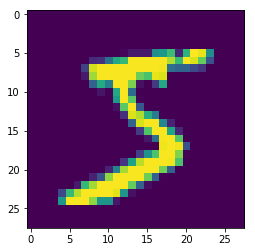

In [0]:
import matplotlib.pyplot as plt
plt.imshow(train_images[0])
print(train_labels[0])

In [0]:
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
model.add(layers.Dense(10, activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [0]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [0]:
history = model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 1s 24us/step - loss: 0.0285 - acc: 0.9918
Epoch 2/5
60000/60000 [==============================] - 1s 24us/step - loss: 0.0214 - acc: 0.9937
Epoch 3/5
60000/60000 [==============================] - 1s 23us/step - loss: 0.0167 - acc: 0.9951
Epoch 4/5
60000/60000 [==============================] - 1s 24us/step - loss: 0.0130 - acc: 0.9965
Epoch 5/5
60000/60000 [==============================] - 1s 23us/step - loss: 0.0100 - acc: 0.9971


In [0]:
history.history

{'acc': [0.9917999999682109,
  0.9937333333015442,
  0.9950833333015442,
  0.9965166666348775,
  0.99715],
 'loss': [0.028540380517641704,
  0.021434522566696007,
  0.016678912006318568,
  0.012988567580655218,
  0.010010659320093691]}

In [0]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('test_acc:', test_acc)
print('test_loss:', test_loss)

10000/10000 [==============================] - 0s 38us/step
test_acc: 0.9802
test_loss: 0.06752217289727414


## Chapter 3

### IMDB Review Classifier (binary classification)

In [0]:
!pip install numpy==1.16.1
import numpy as np
from keras.datasets import imdb

Using TensorFlow backend.


In [0]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [0]:
def vectorize_sequences(sequences, dimensions=10000):
  results = np.zeros((len(sequences), dimensions))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1
  return results

In [0]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [0]:
x_train.shape
x_test.shape
y_train.shape
y_test.shape

(25000, 10000)

In [0]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(8, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [0]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 117us/step - loss: 0.0052 - acc: 0.9997 - val_loss: 0.5823 - val_acc: 0.8690
Epoch 2/20
15000/15000 [==============================] - 2s 115us/step - loss: 0.0127 - acc: 0.9963 - val_loss: 0.5944 - val_acc: 0.8695
Epoch 3/20
15000/15000 [==============================] - 2s 115us/step - loss: 0.0030 - acc: 0.9998 - val_loss: 0.6241 - val_acc: 0.8689
Epoch 4/20
15000/15000 [==============================] - 2s 115us/step - loss: 0.0109 - acc: 0.9967 - val_loss: 0.6476 - val_acc: 0.8682
Epoch 5/20
15000/15000 [==============================] - 2s 115us/step - loss: 0.0016 - acc: 0.9999 - val_loss: 0.6736 - val_acc: 0.8677
Epoch 6/20
15000/15000 [==============================] - 2s 115us/step - loss: 0.0014 - acc: 0.9999 - val_loss: 0.8480 - val_acc: 0.8472
Epoch 7/20
15000/15000 [==============================] - 2s 121us/step - loss: 0.0058 - acc: 0.9985 - val_loss: 0.7223 - 

In [0]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

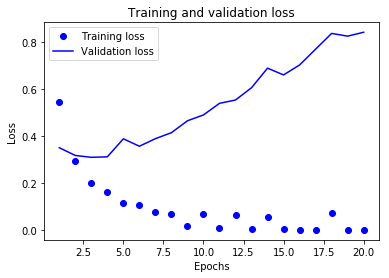

In [0]:
import matplotlib.pyplot as plt

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['acc']
val_acc = history_dict['val_acc']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label="Validation loss")
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

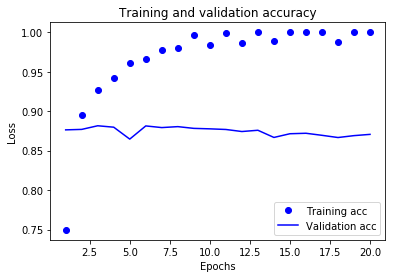

In [0]:
plt.clf()
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Reuters Newswire Classifier (multiclass classification)


In [0]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 2s 1us/step


In [0]:
def vectorize_sequences(sequences, dimensions=10000):
  results = np.zeros((len(sequences), dimensions))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1
  return results

In [0]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [0]:
print(train_data.shape)
print(test_data.shape)
print(x_train.shape)
print(x_test.shape)

(8982,)
(2246,)
(8982, 10000)
(2246, 10000)


In [0]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [0]:
print(one_hot_train_labels.shape)
print(one_hot_test_labels.shape)

(8982, 46)
(2246, 46)


In [0]:
from keras import models, layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# End the network with a Dense layer of 46 because each entry in the vector will encode a different output class
# The last layer uses a softmax activation to output a probability distribution over the 46 different classes

In [0]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [0]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))
# history = model.fit(x_train, one_hot_train_labels, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 187us/step - loss: 2.6689 - acc: 0.5361 - val_loss: 1.7328 - val_acc: 0.6420
Epoch 2/20
7982/7982 [==============================] - 1s 65us/step - loss: 1.4084 - acc: 0.7073 - val_loss: 1.2946 - val_acc: 0.7150
Epoch 3/20
7982/7982 [==============================] - 1s 64us/step - loss: 1.0358 - acc: 0.7811 - val_loss: 1.1376 - val_acc: 0.7610
Epoch 4/20
7982/7982 [==============================] - 1s 64us/step - loss: 0.8076 - acc: 0.8331 - val_loss: 1.0256 - val_acc: 0.7850
Epoch 5/20
7982/7982 [==============================] - 1s 68us/step - loss: 0.6405 - acc: 0.8651 - val_loss: 0.9645 - val_acc: 0.7970
Epoch 6/20
7982/7982 [==============================] - 1s 82us/step - loss: 0.5155 - acc: 0.8939 - val_loss: 0.9141 - val_acc: 0.8200
Epoch 7/20
7982/7982 [==============================] - 1s 83us/step - loss: 0.4116 - acc: 0.9129 - val_loss: 0.9016 - val_acc: 0.8050
Epoch 

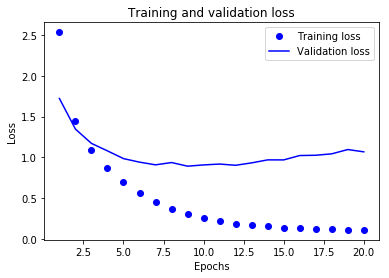

In [0]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

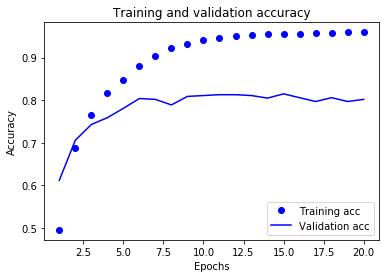

In [0]:
plt.clf()

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [0]:
print(model.metrics_names)
print(model.evaluate(x_test, one_hot_test_labels))

['loss', 'acc']
2246/2246 [==============================] - 0s 90us/step
[1.2092603059719422, 0.778717720444884]


In [0]:
predictions = model.predict(x_test)
print(predictions[0].shape)
print(np.sum(predictions[0]))

(46,)
1.0000001


### House Price Predictor (scalar regression)

In [0]:
from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()
# Targets are the median values of homes in thousands of dollars

Using TensorFlow backend.


57344/57026 [==============================] - 0s 3us/step


In [0]:
print(train_data[0][:])
print(train_data.shape)

[  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]
(404, 13)


In [0]:
from keras import models, layers

def build_model():
  model = models.Sequential()
  model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(1))  # No activation means linear activation
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  model.summary()
  return model

build_model()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                896       
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


In [0]:
# K-fold cross-validation with 100 epochs
import numpy as np

k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

for i in range(k):
  print('processing fold #', i)
  val_data = train_data[i * num_val_samples:(i + 1) * num_val_samples]
  val_targets = train_targets[i * num_val_samples:(i + 1) * num_val_samples]
  
  partial_train_data = np.concatenate(
    [train_data[:i * num_val_samples],
    train_data[(i + 1) * num_val_samples:]],
    axis=0)
  partial_train_targets = np.concatenate(
    [train_targets[:i * num_val_samples],
    train_targets[(i + 1) * num_val_samples:]],
    axis=0)
  
  model = build_model()
  model.fit(
      partial_train_data, 
      partial_train_targets, 
      epochs=num_epochs, 
      batch_size=1, 
      verbose=0)
  val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
  all_scores.append(val_mae)

processing fold # 0
Instructions for updating:
Use tf.cast instead.
processing fold # 1
processing fold # 2
processing fold # 3


In [0]:
print(all_scores)
print(np.mean(all_scores))
# This value means the difference between the predicted house prices and the 
# actual house prices in thousands. So we're off by around $3000.

[3.1972371446024073, 3.3459766076342894, 3.9142096916047655, 3.2717066354090623]
3.432282519812631


In [0]:
# K-fold cross-validation with 500 epochs
import numpy as np

k = 4
num_val_samples = len(train_data) // k
num_epochs = 500
all_mae_histories = []

for i in range(k):
  print('processing fold #', i)
  val_data = train_data[i * num_val_samples:(i + 1) * num_val_samples]
  val_targets = train_targets[i * num_val_samples:(i + 1) * num_val_samples]
  
  partial_train_data = np.concatenate(
    [train_data[:i * num_val_samples],
    train_data[(i + 1) * num_val_samples:]],
    axis=0)
  partial_train_targets = np.concatenate(
    [train_targets[:i * num_val_samples],
    train_targets[(i + 1) * num_val_samples:]],
    axis=0)
  
  model = build_model()
  history = model.fit(
      partial_train_data, 
      partial_train_targets, 
      validation_data=(val_data, val_targets),
      epochs=num_epochs, 
      batch_size=1, 
      verbose=0)
  mae_history = history.history['val_mean_absolute_error']
  all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


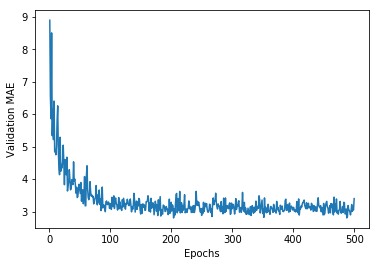

In [0]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [0]:
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

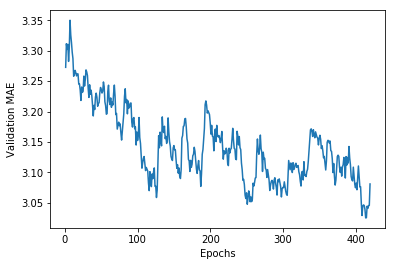

In [0]:
smooth_mae_history = smooth_curve(average_mae_history[80:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

# Part 2

## Chapter 5

### MNIST Classifier (Convnets)

In [0]:
from keras import layers, models
from keras.datasets import mnist
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Using TensorFlow backend.


11493376/11490434 [==============================] - 0s 0us/step


In [0]:
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [0]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dens

In [0]:
history = model.fit(train_images, train_labels, epochs=5, batch_size=64)

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
60000/60000 [==============================] - 67s 1ms/step - loss: 0.1792 - acc: 0.9436
Epoch 2/5
60000/60000 [==============================] - 67s 1ms/step - loss: 0.0513 - acc: 0.9843
Epoch 3/5
60000/60000 [==============================] - 66s 1ms/step - loss: 0.0348 - acc: 0.9897
Epoch 4/5
60000/60000 [==============================] - 65s 1ms/step - loss: 0.0261 - acc: 0.9921
Epoch 5/5
60000/60000 [==============================] - 66s 1ms/step - loss: 0.0215 - acc: 0.9935


In [0]:
history.history

{'acc': [0.9440333333333333,
  0.98595,
  0.9903666666666666,
  0.9926333333333334,
  0.9944666666666667],
 'loss': [0.17857688171764216,
  0.04517738982768108,
  0.032537209455129536,
  0.023727229204634204,
  0.019126027253918196]}

### Cat and Dog Classifier

In [0]:
from google.colab import drive
drive.mount('/content/drive')
base_dir = '/content/drive/My Drive/Colab Notebooks/cats_and_dogs_small'
# Data from: https://www.kaggle.com/c/dogs-vs-cats/data

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import os

train_dir = os.path.join(base_dir, 'train')
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

validation_dir = os.path.join(base_dir, 'validation')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

test_dir = os.path.join(base_dir, 'test')
test_cats_dir = os.path.join(test_dir, 'cats')
test_dogs_dir = os.path.join(test_dir, 'dogs')

saved_model_dir = os.path.join(base_dir, 'cats_and_dogs_small_1.h5')

In [0]:
from keras import layers, models, optimizers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 15, 15, 128)       147584    
__________

In [0]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
  rescale=1./255,
  rotation_range=40,
  width_shift_range=0.2,
  height_shift_range=0.2,
  shear_range=0.2,
  zoom_range=0.2,
horizontal_flip=True,)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
  train_dir,
  target_size=(150, 150),
  batch_size=32,
  class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
  validation_dir,
  target_size=(150, 150),
  batch_size=32,
  class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [0]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (32, 150, 150, 3)
labels batch shape: (32,)


In [0]:
# Use 100 steps per epoch because 100 batches/epoch * 20 samples/batch = 2000 samples/epoch
history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=100, validation_data=validation_generator, validation_steps=50)
model.save(saved_model_dir)

Epoch 1/100
100/100 [==============================] - 33s 330ms/step - loss: 0.6884 - acc: 0.5228 - val_loss: 0.6956 - val_acc: 0.5324
Epoch 2/100
100/100 [==============================] - 32s 322ms/step - loss: 0.6699 - acc: 0.5887 - val_loss: 0.6705 - val_acc: 0.5818
Epoch 3/100
100/100 [==============================] - 30s 299ms/step - loss: 0.6574 - acc: 0.6009 - val_loss: 0.6348 - val_acc: 0.6326
Epoch 4/100
100/100 [==============================] - 31s 308ms/step - loss: 0.6328 - acc: 0.6397 - val_loss: 0.6327 - val_acc: 0.6282
Epoch 5/100
100/100 [==============================] - 30s 299ms/step - loss: 0.6194 - acc: 0.6550 - val_loss: 0.6163 - val_acc: 0.6421
Epoch 6/100
100/100 [==============================] - 30s 302ms/step - loss: 0.6078 - acc: 0.6691 - val_loss: 0.6040 - val_acc: 0.6579
Epoch 7/100
100/100 [==============================] - 31s 312ms/step - loss: 0.5998 - acc: 0.6819 - val_loss: 0.5694 - val_acc: 0.7018
Epoch 8/100
100/100 [===========================

In [0]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [0]:
from keras.preprocessing import image

# Data augmentation
datagen = ImageDataGenerator(
  rotation_range=40,
  width_shift_range=0.2,
  height_shift_range=0.2,
  shear_range=0.2,
  zoom_range=0.2,
  horizontal_flip=True,
  fill_mode='nearest')

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]
img_path = fnames[3]
img = image.load_img(img_path, target_size=(150, 150))
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)

i = 0
for batch in datagen.flow(x, batch_size=1):
  plt.figure(i)
  imgplot = plt.imshow(image.array_to_img(batch[0]))
  i += 1
  if i % 4 == 0:
    break

plt.show()

### Pretrained Network (No data augmentation)

In [0]:
from keras.applications import VGG16

conv_base = VGG16(
    weights='imagenet',  # The weight checkpoint from which to initialize the model
    include_top=False,  # If to include the densely connected classifier
    input_shape=(150, 150, 3)
)

58892288/58889256 [==============================] - 1s 0us/step


In [0]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [0]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

from google.colab import drive
drive.mount('/content/drive')
base_dir = '/content/drive/My Drive/Colab Notebooks/cats_and_dogs_small'
# Data from: https://www.kaggle.com/c/dogs-vs-cats/data

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
  features = np.zeros(shape=(sample_count, 4, 4, 512))
  labels = np.zeros(shape=(sample_count))
  generator = datagen.flow_from_directory(
    directory,
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='binary')
  i = 0
  for inputs_batch, labels_batch in generator:
    # Run the pretrained network on the images
    features_batch = conv_base.predict(inputs_batch)
    features[i * batch_size : (i + 1) * batch_size] = features_batch
    labels[i * batch_size : (i + 1) * batch_size] = labels_batch
    i += 1
    if i * batch_size >= sample_count:
      break
  return features, labels

train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

In [0]:
train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))

In [0]:
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
  loss='binary_crossentropy',
  metrics=['acc'])

history = model.fit(train_features, train_labels,
  epochs=30,
  batch_size=20,
  validation_data=(validation_features, validation_labels))

In [0]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Pretrained Network (Data augmentation)

In [0]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [0]:
# conv_base.summary()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_3 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [0]:
print('This is the number of trainable weights before freezing the conv base:', 
      len(model.trainable_weights))
conv_base.trainable = False
print('This is the number of trainable weights after freezing the conv base:', 
      len(model.trainable_weights))

This is the number of trainable weights before freezing the conv base: 30
This is the number of trainable weights after freezing the conv base: 4


In [0]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

train_datagen = ImageDataGenerator(
  rescale=1./255,
  rotation_range=40,
  width_shift_range=0.2,
  height_shift_range=0.2,
  shear_range=0.2,
  zoom_range=0.2,
  horizontal_flip=True,
  fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
  train_dir,
  target_size=(150, 150),
  batch_size=20,
  class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
  validation_dir,
  target_size=(150, 150),
  batch_size=20,
  class_mode='binary')

model.compile(loss='binary_crossentropy',
  optimizer=optimizers.RMSprop(lr=2e-5),
  metrics=['acc'])

history = model.fit_generator(
  train_generator,
  steps_per_epoch=100,
  epochs=30,
  validation_data=validation_generator,
  validation_steps=50)

In [0]:
# Defrosting the last layer of the pretrained model
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

In [0]:
# Fine tuning the network
model.compile(
    loss='binary_crossentropy', 
    optimizer=optimizers.RMSprop(lr=1e-5), 
    metrics=['acc'])

history = model.fit_generator(
    train_generator, 
    steps_per_epoch=100, 
    epochs=100, 
    validation_data=validation_generator, 
    validation_steps=50)

In [0]:
# Used to smooth the loss curves
def smooth_curve(points, factor=0.8):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

plt.plot(epochs,
  smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs,
  smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,
  smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs,
  smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [0]:
test_generator = test_datagen.flow_from_directory(
  test_dir,
  target_size=(150, 150),
  batch_size=20,
  class_mode='binary')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

### Visualizing Intermediate Activations

In [0]:
from google.colab import drive
drive.mount('/content/drive')
base_dir = '/content/drive/My Drive/Colab Notebooks/cats_and_dogs_small'
saved_model_dir = os.path.join(base_dir, 'cats_and_dogs_small_1.h5')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
from keras.models import load_model
model = load_model(saved_model_dir)

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 15, 15, 128)       147584    
__________

In [0]:
img_path = os.path.join(base_dir, 'test/cats/cat.1700.jpg')

from keras.preprocessing import image
import numpy as np

img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.

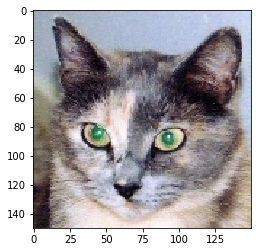

In [0]:
import matplotlib.pyplot as plt

plt.imshow(img_tensor[0])
plt.show()

In [0]:
print(img_tensor.shape)
print(model.layers)

(1, 150, 150, 3)
[<keras.layers.convolutional.Conv2D object at 0x7fd011687828>, <keras.layers.pooling.MaxPooling2D object at 0x7fd011687198>, <keras.layers.convolutional.Conv2D object at 0x7fd01169bf60>, <keras.layers.pooling.MaxPooling2D object at 0x7fd0116cddd8>, <keras.layers.convolutional.Conv2D object at 0x7fd011687748>, <keras.layers.pooling.MaxPooling2D object at 0x7fd0116b57f0>, <keras.layers.convolutional.Conv2D object at 0x7fd0116cda20>, <keras.layers.pooling.MaxPooling2D object at 0x7fd0116c1080>, <keras.layers.core.Flatten object at 0x7fd0116b52b0>, <keras.layers.core.Dense object at 0x7fd0116c1358>, <keras.layers.core.Dense object at 0x7fd011668c88>]


In [0]:
from keras import models

# Extract the outputs of the top eight layers
layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(img_tensor)

(1, 148, 148, 32)


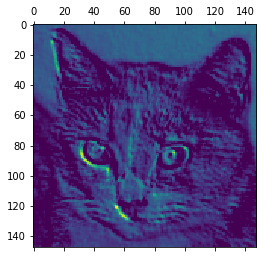

In [0]:
# To visualize a channel for an activation layer
first_layer_activation = activations[0]
print(first_layer_activation.shape)
plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')

In [0]:
for layer in model.layers[:8]:
   print(layer.name)

conv2d_9
max_pooling2d_9
conv2d_10
max_pooling2d_10
conv2d_11
max_pooling2d_11
conv2d_12
max_pooling2d_12


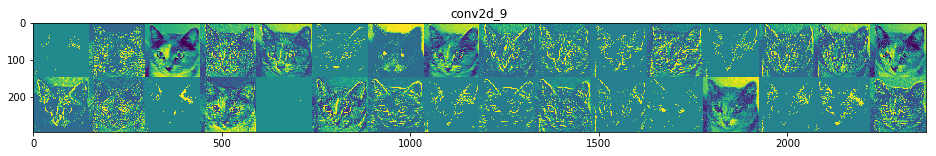

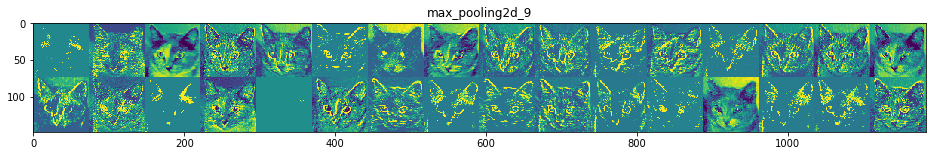

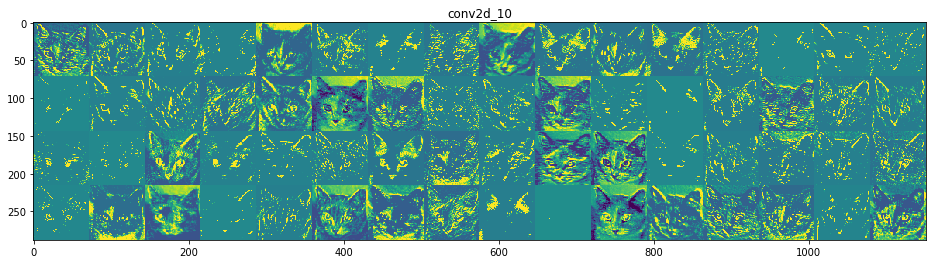

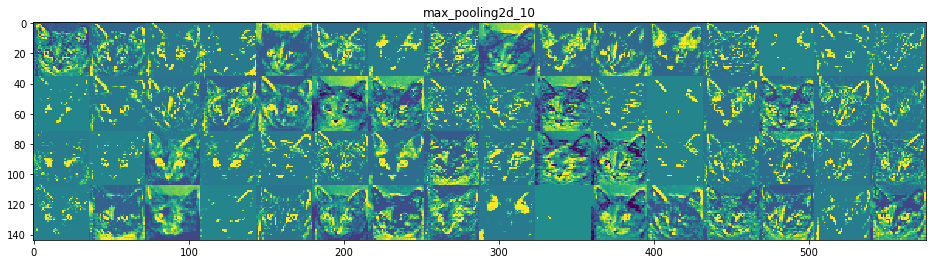

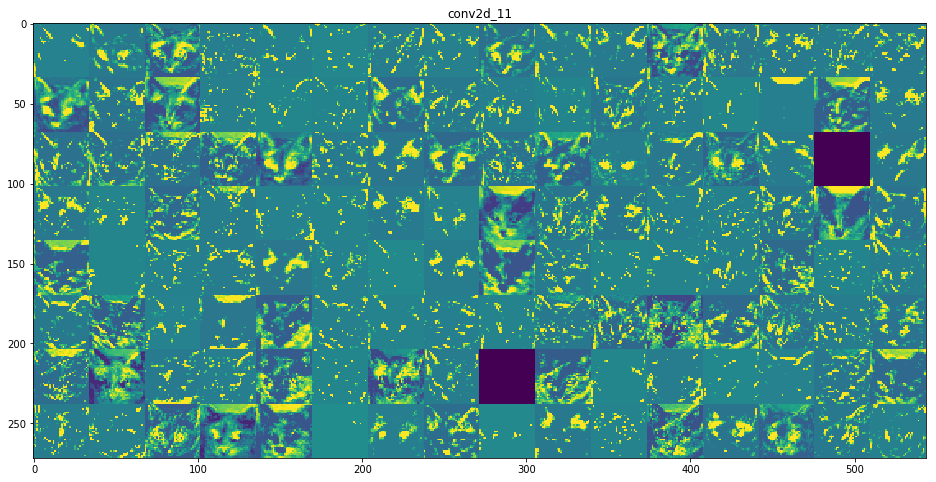

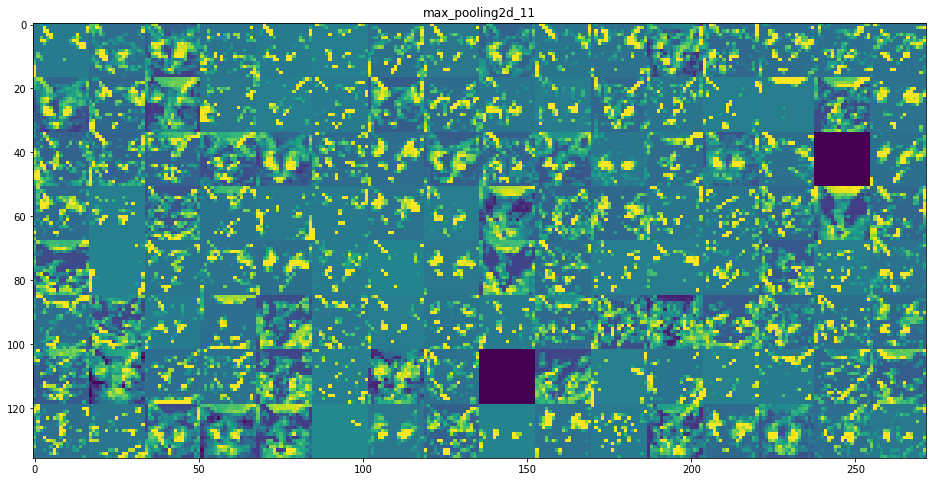

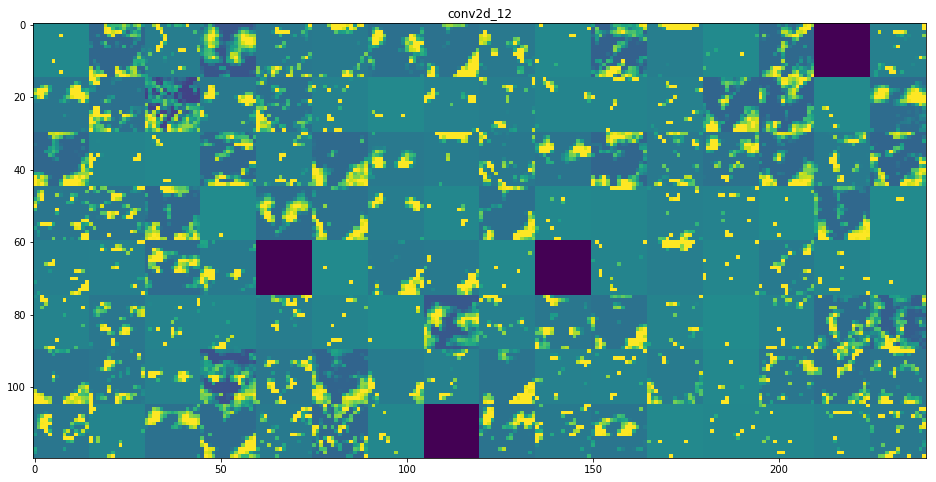

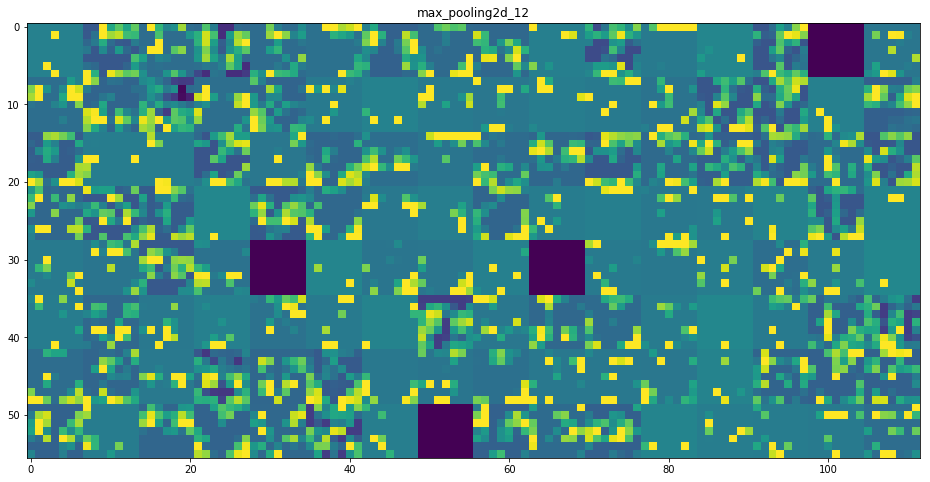

In [0]:
# To visualize all channels in all activation layers
layer_names = []
for layer in model.layers[:8]:
  layer_names.append(layer.name)

images_per_row = 16

for layer_name, layer_activation in zip(layer_names, activations):
  n_features = layer_activation.shape[-1]
  
  size = layer_activation.shape[1]
  
  n_cols = n_features // images_per_row
  display_grid = np.zeros((size * n_cols, images_per_row * size))
  
  for col in range(n_cols):
    for row in range(images_per_row):
      channel_image = layer_activation[0, :, :, col * images_per_row + row]
      
      channel_image -= channel_image.mean()
      channel_image /= channel_image.std()
      channel_image *= 64
      channel_image += 128
      channel_image = np.clip(channel_image, 0, 255).astype('uint8')
      display_grid[col * size : (col + 1) * size, row * size : (row + 1) * size] = channel_image

  scale = 1. / size
  plt.figure(figsize=(scale * display_grid.shape[1], scale * display_grid.shape[0]))
  plt.title(layer_name)
  plt.grid(False)
  plt.imshow(display_grid, aspect='auto', cmap='viridis')

### Visualizing Convnet Filters

In [0]:
# Defining the loss tensor for filter visualization
from keras.applications import VGG16
from keras import backend as K

model = VGG16(weights='imagenet', include_top=False)

layer_name = 'block3_conv1'
filter_index = 0

layer_output = model.get_layer(layer_name).output
loss = K.mean(layer_output[:, :, :, filter_index])

# Obtaining the gradient of the loss with regard to the input
grads = K.gradients(loss, model.input)[0]

# Gradient-normalization trick
grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)  # Add 1e-5 to avoid dividing by 0

In [0]:
# Fetching numpy output values given numpy input values
iterate = K.function([model.input], [loss, grads])

import numpy as np
loss_value, grads_value = iterate([np.zeros((1, 150, 150, 3))])

In [0]:
# Loss maximization via SGD
input_img_data = np.random.random((1, 150, 150, 3)) * 20 + 128.

step = 1
for i in range(40):
  loss_value, grads_value = iterate([input_img_data])
  input_img_data += grads_value * step

In [0]:
# Utility function to convert a tensor into a valid image
def deprocess_image(x):
  x -= x.mean()
  x /= (x.std() + 1e-5)
  x *= 0.1
  
  x += 0.5
  x = np.clip(x, 0, 1)
  
  x *= 255
  x = np.clip(x, 0, 255).astype('uint8')
  return x

In [0]:
# Function to generate filter visualization
def generate_pattern(layer_name, filter_index, size=150):
  layer_output = model.get_layer(layer_name).output
  loss = K.mean(layer_output[:, :, :, filter_index])
  
  grads = K.gradients(loss, model.input)[0]
  
  grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)
  
  iterate = K.function([model.input], [loss, grads])
  
  input_img_data = np.random.random((1, size, size, 3)) * 20 + 128.
  
  step = 1.
  for i in range(40):
    loss_value, grads_value = iterate([input_img_data])
    input_img_data += grads_value * step
    img = input_img_data[0]
  return deprocess_image(img)

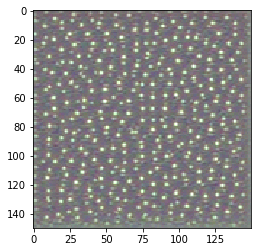

In [0]:
# Show a single filter
plt.imshow(generate_pattern(layer_name, 0))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


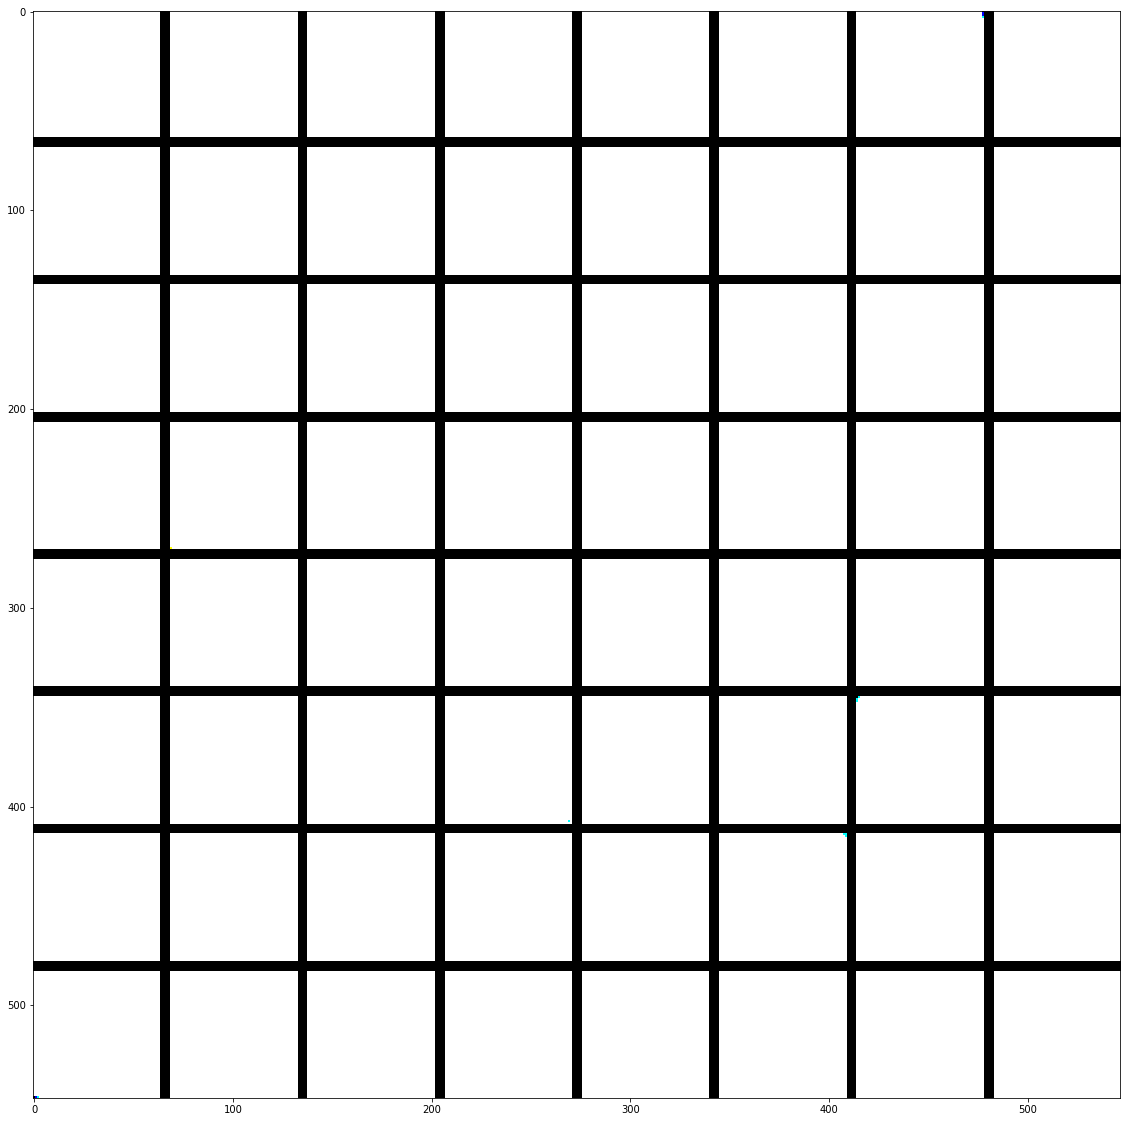

In [0]:
# Show all filters in a layer
layer_name = 'block1_conv1'
size = 64
margin = 5

results = np.zeros((8 * size + 7 * margin, 8 * size + 7 * margin, 3))

for i in range(8):
  for j in range(8):
    filter_img = generate_pattern(layer_name, i + (j * 8), size=size)
    
    horizontal_start = i * size + i * margin
    horizontal_end = horizontal_start + size
    vertical_start = j * size + j * margin
    vertical_end = vertical_start + size
    results[horizontal_start: horizontal_end,
    vertical_start: vertical_end, :] = filter_img

plt.figure(figsize=(20, 20))
plt.imshow(results)

### Visualizing Heatmaps of Class Activation

In [0]:
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions

model = VGG16(weights='imagenet')

553467904/553467096 [==============================] - 8s 0us/step


In [0]:
from google.colab import drive
drive.mount('/content/drive')
base_dir = '/content/drive/My Drive/Colab Notebooks/cats_and_dogs_small'
img_path = os.path.join(base_dir, 'test/cats/cat.1702.jpg')
output_heatmap_path = os.path.join(base_dir, 'output_heatmap.jpg')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
from keras.preprocessing import image
import numpy as np

img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

In [0]:
preds = model.predict(x)
print('Predicted:', decode_predictions(preds, top=3)[0])
print(np.argmax(preds[0]))

Predicted: [('n01883070', 'wombat', 0.74964803), ('n01882714', 'koala', 0.13236125), ('n02364673', 'guinea_pig', 0.036912516)]
106


In [0]:
# Setting up the Grad-CAM algorithm
cat_output = model.output[: np.argmax(preds[0])]

last_conv_layer = model.get_layer('block5_conv3')
grads = K.gradients(cat_output, last_conv_layer.output)[0]
pooled_grads = K.mean(grads, axis=(0, 1, 2))

iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])

pooled_grads_value, conv_layer_output_value = iterate([x])

for i in range(512):
  conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

heatmap = np.mean(conv_layer_output_value, axis=-1)

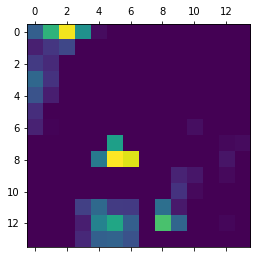

In [0]:
# Heatmap post-processing
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
plt.matshow(heatmap)

In [0]:
import cv2
img = cv2.imread(img_path)
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
superimposed_img = heatmap * 0.4 + img
cv2.imwrite(output_heatmap_path, superimposed_img)

True

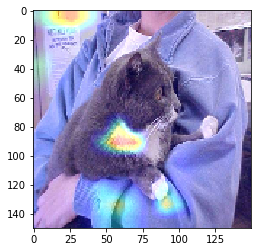

In [0]:
# Display heatmap superimposed onto the image
import matplotlib.pyplot as plt

img_path = os.path.join(output_heatmap_path)

img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.

plt.imshow(img_tensor[0])
plt.show()

## Chapter 6

### One-Hot Encoding

In [0]:
# Word-level encoding
import numpy as np

samples = ['The cat sat on the mat.', 'The dog ate my homework.']

# Extract the tokens from text
token_index = {}
for sample in samples:
  for word in sample.split():
    if word not in token_index:
      token_index[word] = len(token_index) + 1

max_length = 10

# Convert the token into one-hot vectors
results = np.zeros(shape=(len(samples), max_length, max(token_index.values()) + 1))
for i, sample in enumerate(samples):
  for j, word in list(enumerate(sample.split()))[:max_length]:
    index = token_index.get(word)
    results[i, j, index] = 1

In [0]:
print(token_index)
print(results[0, :, :])

{'The': 1, 'cat': 2, 'sat': 3, 'on': 4, 'the': 5, 'mat.': 6, 'dog': 7, 'ate': 8, 'my': 9, 'homework.': 10}
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [0]:
# Character-level encoding
import numpy as np
import string
samples = ['The cat sat on the mat.', 'The dog ate my homework.']
characters = string.printable
token_index = dict(zip(range(1, len(characters) + 1), characters))

max_length = 50
results = np.zeros((len(samples), max_length, max(token_index.keys()) + 1))
for i, sample in enumerate(samples):
  for j, character in enumerate(sample):
    index = token_index.get(character)
    results[i, j, index] = 1.

In [0]:
# Keras one-hot encoding
from keras.preprocessing.text import Tokenizer

samples = ['The cat sat on the mat.', 'The dog ate my homework.']

tokenizer = Tokenizer(num_words=1000)  # Take the 1000 most common words
tokenizer.fit_on_texts(samples)

sequences = tokenizer.texts_to_sequences(samples)

one_hot_results = tokenizer.texts_to_matrix(samples, mode='binary')

word_index = tokenizer.word_index
print('Found {} unique tokens.'.format(len(word_index)))
print(one_hot_results)

Found 9 unique tokens.
[[0. 1. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [0]:
# One-hot encoding with hashing trick
samples = ['The cat sat on the mat.', 'The dog ate my homework.']

dimensionality = 1000  # The number of unique words you want to encode
max_length = 10

results = np.zeros((len(samples), max_length, dimensionality))
for i, sample in enumerate(samples):
  for j, word in list(enumerate(sample.split()))[:max_length]:
    index = abs(hash(word)) % dimensionality
    results[i, j, index] = 1.

### IMDB Reviews with Learned Embedding

In [0]:
!pip install numpy==1.16.1
from keras.datasets import imdb
from keras import preprocessing

max_features = 10000
maxlen = 20

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

Using TensorFlow backend.


In [0]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding

model = Sequential()
model.add(Embedding(10000, 8, input_length=maxlen))

model.add(Flatten())

model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 20, 8)             80000     
_________________________________________________________________
flatten_1 (Flatten)          (None, 160)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 161       
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________


In [0]:
history = model.fit(x_train, y_train,
  epochs=10,
  batch_size=32,
  validation_split=0.2)

Instructions for updating:
Use tf.cast instead.
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 4s 208us/step - loss: 0.6759 - acc: 0.6050 - val_loss: 0.6398 - val_acc: 0.6814
Epoch 2/10
20000/20000 [==============================] - 2s 87us/step - loss: 0.5657 - acc: 0.7427 - val_loss: 0.5467 - val_acc: 0.7206
Epoch 3/10
20000/20000 [==============================] - 2s 88us/step - loss: 0.4752 - acc: 0.7808 - val_loss: 0.5113 - val_acc: 0.7384
Epoch 4/10
20000/20000 [==============================] - 2s 87us/step - loss: 0.4263 - acc: 0.8077 - val_loss: 0.5008 - val_acc: 0.7452
Epoch 5/10
20000/20000 [==============================] - 2s 87us/step - loss: 0.3930 - acc: 0.8258 - val_loss: 0.4981 - val_acc: 0.7538
Epoch 6/10
20000/20000 [==============================] - 2s 87us/step - loss: 0.3668 - acc: 0.8395 - val_loss: 0.5014 - val_acc: 0.7530
Epoch 7/10
20000/20000 [==============================] - 2s 87us/step - loss: 0

### GloVe Pretrained Embeddings

In [0]:
# Process the raw IMDB data
import os
imdb_dir = '/Users/fchollet/Downloads/aclImdb'
train_dir = os.path.join(imdb_dir, 'train')

labels = []
texts = []

for label_type in ['neg', 'pos']:
  dir_name = os.path.join(train_dir, label_type)
  for fname in os.listdir(dir_name):
    if fname[-4:] == '.txt':
      f = open(os.path.join(dir_name, fname))
      texts.append(f.read())
      f.close()
      if label_type == 'neg':
        labels.append(0)
      else:
        labels.append(1)

In [0]:
# Tokenize the text
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

maxlen = 100
training_samples = 200
validation_samples = 10000
max_words = 10000

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)

labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

In [0]:
# Parse the GloVe word-embeddings
glove_dir = '/Users/fchollet/Downloads/glove.6B'

embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'))
for line in f:
  values = line.split()
  word = values[0]
  coefs = np.asarray(values[1:], dtype='float32')
  embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

In [0]:
# Prepare the GloVe word-embeddings matrix
embedding_dim = 100
embedding_matrix = np.zeros((max_words, embedding_dim))

for word, i in word_index.items():
  if i < max_words:
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
      embedding_matrix[i] = embedding_vector

In [0]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
  loss='binary_crossentropy',
  metrics=['acc'])
model.summary()

In [0]:
# Load pretrained embeddings
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

In [0]:
history = model.fit(x_train, y_train,
  epochs=10,
  batch_size=32,
  validation_data=(x_val, y_val))
model.save_weights('pre_trained_glove_model.h5')

In [0]:
# Plot the results
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [0]:
# Tokenizing the test data
test_dir = os.path.join(imdb_dir, 'test')

labels = []
texts = []

for label_type in ['neg', 'pos']:
  dir_name = os.path.join(test_dir, label_type)
  for fname in sorted(os.listdir(dir_name)):
    if fname[-4:] == '.txt':
      f = open(os.path.join(dir_name, fname))
      texts.append(f.read())
      f.close()
      if label_type == 'neg':
        labels.append(0)
      else:
        labels.append(1)

sequences = tokenizer.texts_to_sequences(texts)
x_test = pad_sequences(sequences, maxlen=maxlen)
y_test = np.asarray(labels)

In [0]:
model.load_weights('pre_trained_glove_model.h5')
model.evaluate(x_test, y_test)

### Recurrent Neural Networks

In [0]:
# Pseudocode RNN
state_t = 0
for input_t in input_sequence:
  output_t = f(input_t, state_t)
  # or
  output_t = activation(dot(W, input_t) + dot(U, state_t) + b)
  state_t = output_t

In [0]:
# Numpy implementation of a simple RNN
import numpy as np

timesteps = 100
input_features = 32
output_features = 64

inputs = np.random.random((timesteps, input_features))

state_t = np.zeros((output_features,))

W = np.random.random((output_features, input_features))
U = np.random.random((output_features, output_features))
b = np.random.random((output_features,))

successive_outputs = []

for input_t in inputs:
  output_t = np.tanh(np.dot(W, input_t) + np.dot(U, state_t) + b)
  successive_outputs.append(output_t)
  state_t = output_t

final_output_sequence = np.concatenate(successive_outputs, axis=0)

# or the Keras equivalent
from keras.layers import SimpleRNN

### IMDB Reviews with RNN

In [0]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000
maxlen = 500
batch_size = 32

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test_sequences')

print('Pad sequence (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Loading data...
25000 train sequences
25000 test_sequences
Pad sequence (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [0]:
from keras.layers import Dense, Embedding, SimpleRNN

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [0]:
history = model.fit(input_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 26s 1ms/step - loss: 0.6474 - acc: 0.6084 - val_loss: 0.4965 - val_acc: 0.7884
Epoch 2/10
20000/20000 [==============================] - 27s 1ms/step - loss: 0.4130 - acc: 0.8218 - val_loss: 0.4827 - val_acc: 0.7684
Epoch 3/10
20000/20000 [==============================] - 26s 1ms/step - loss: 0.2930 - acc: 0.8831 - val_loss: 0.3583 - val_acc: 0.8478
Epoch 4/10
20000/20000 [==============================] - 26s 1ms/step - loss: 0.2213 - acc: 0.9148 - val_loss: 0.3584 - val_acc: 0.8540
Epoch 5/10
20000/20000 [==============================] - 28s 1ms/step - loss: 0.1600 - acc: 0.9425 - val_loss: 0.3898 - val_acc: 0.8594
Epoch 6/10
20000/20000 [==============================] - 26s 1ms/step - loss: 0.1089 - acc: 0.9623 - val_loss: 0.4332 - val_acc: 0.8466
Epoch 7/10
20000/20000 [==============================] - 26s 1ms/step - loss: 0.0674 - acc: 0.9775 - val_loss: 0.5109 - val_acc:

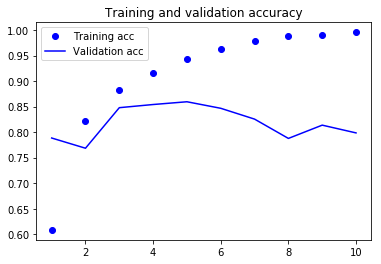

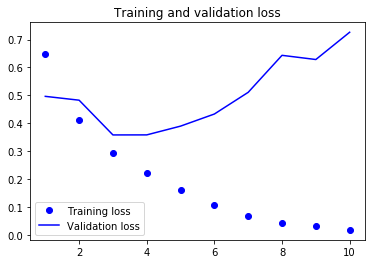

In [0]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### IMDB Reviews with LSTM

In [0]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000
maxlen = 500
batch_size = 32

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test_sequences')

print('Pad sequence (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Loading data...
25000 train sequences
25000 test_sequences
Pad sequence (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [0]:
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
  loss='binary_crossentropy',
  metrics=['acc'])

In [0]:
history = model.fit(input_train, y_train,
  epochs=10,
  batch_size=128,
  validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 117s 6ms/step - loss: 0.4978 - acc: 0.7685 - val_loss: 0.3904 - val_acc: 0.8424
Epoch 2/10
 3456/20000 [====>.........................] - ETA: 1:28 - loss: 0.3167 - acc: 0.8785

KeyboardInterrupt: ignored

### Temperature Forecasting with GRU

In [0]:
import os

data_dir = '/users/fchollet/Downloads/jena_climate'
fname = os.path.join(data_dir, 'jena_climate_2009_2016.csv')

f = open(fname)
data = f.read()
f.close()

lines = data.split('\n')
header = lines[0].split(',')
lines = lines[1:]

print(header)
print(len(lines))

In [0]:
# Header output
["Date Time",
  "p (mbar)",
  "T (degC)",
  "Tpot (K)",
  "Tdew (degC)",
  "rh (%)",
  "VPmax (mbar)",
  "VPact (mbar)",
  "VPdef (mbar)",
  "sh (g/kg)",
  "H2OC (mmol/mol)",
  "rho (g/m**3)",
  "wv (m/s)",
  "max. wv (m/s)",
  "wd (deg)"]

In [0]:
import numpy as np

float_data = np.zeros((len(lines), len(header) - 1))
for i, line in enumerate(lines):
  values = [float(x) for x in line.split(',')[1:]]
  float_data[i, :] = values

In [0]:
# Normalize the data
mean = float_data[:200000].mean(axis=0)
float_data -= mean
std = float_data[:200000].std(axis=0)
float_data /= std

In [0]:
# GRU example
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.GRU(32, input_shape=(None, float_data.shape[-1])))
model.add(layers.Dense(1))
model.compile(optimizer=RMSprop(), loss='mae')

history = model.fit_generator(train_gen,
  steps_per_epoch=500,
  epochs=20,
  validation_data=val_gen,
  validation_steps=val_steps)

In [0]:
# Dropout-regularized GRU model
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.GRU(32,
  dropout=0.2,
  recurrent_dropout=0.2,
  input_shape=(None, float_data.shape[-1])))
model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen,
  steps_per_epoch=500,
  epochs=40,
  validation_data=val_gen,
  validation_steps=val_steps)

In [0]:
# Dropout-regularized stacked GRU model
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.GRU(32,
  dropout=0.1,
  recurrent_dropout=0.5,
  return_sequences=True,
  input_shape=(None, float_data.shape[-1])))
model.add(layers.GRU(64, activation='relu',
  dropout=0.1,
  recurrent_dropout=0.5))
model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen,
  steps_per_epoch=500,
  epochs=40,
  validation_data=val_gen,
  validation_steps=val_steps)

### IMDB Reviews with Reversed Sequences

In [0]:
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras import layers
from keras.models import Sequential

max_features = 10000
maxlen = 500

(x_train, y_train), (x_test, y_test) = imdb.load_data(
num_words=max_features)

x_train = [x[::-1] for x in x_train]
x_test = [x[::-1] for x in x_test]

x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

model = Sequential()
model.add(layers.Embedding(max_features, 128))
model.add(layers.LSTM(32))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
  loss='binary_crossentropy',
  metrics=['acc'])

history = model.fit(x_train, y_train,
  epochs=10,
  batch_size=128,
  validation_split=0.2)

In [0]:
# Bidirectional LSTM
model = Sequential()
model.add(layers.Embedding(max_features, 32))
model.add(layers.Bidirectional(layers.LSTM(32)))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history = model.fit(x_train, y_train,
  epochs=10,
  batch_size=128,
  validation_split=0.2)

### IMDB Reviews with 1D Convnets

In [0]:
!pip install numpy==1.16.1
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000
max_len = 500

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_test = sequence.pad_sequences(x_test, maxlen=max_len)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

Using TensorFlow backend.


Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 500)
x_test shape: (25000, 500)


In [0]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.Embedding(max_features, 128, input_length=max_len))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.MaxPooling1D(5))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1))
model.compile(optimizer=RMSprop(lr=1e-4), loss='binary_crossentropy', metrics=['acc'])
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 128)          1280000   
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 494, 32)           28704     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 98, 32)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 92, 32)            7200      
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 1,315,937
Trainable params: 1,315,937
Non-trainable para

In [0]:
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 7s 352us/step - loss: 0.8337 - acc: 0.5095 - val_loss: 0.6873 - val_acc: 0.5654
Epoch 2/10
20000/20000 [==============================] - 1s 69us/step - loss: 0.6699 - acc: 0.6391 - val_loss: 0.6641 - val_acc: 0.6582
Epoch 3/10
20000/20000 [==============================] - 1s 69us/step - loss: 0.6234 - acc: 0.7529 - val_loss: 0.6078 - val_acc: 0.7428
Epoch 4/10
20000/20000 [==============================] - 1s 70us/step - loss: 0.5255 - acc: 0.8080 - val_loss: 0.4841 - val_acc: 0.8062
Epoch 5/10
20000/20000 [==============================] - 1s 69us/step - loss: 0.4092 - acc: 0.8491 - val_loss: 0.4308 - val_acc: 0.8310
Epoch 6/10
20000/20000 [==============================] - 1s 69us/step - loss: 0.3447 - acc: 0.8681 - val_loss: 0.4125 - val_acc: 0.8406
Ep

## Chapter 7

### Keras Functional API

In [0]:
from keras.models import Sequential, Model
from keras import layers
from keras import Input

seq_model = Sequential()
seq_model.add(layers.Dense(32, activation='relu', input_shape=(64,)))
seq_model.add(layers.Dense(32, activation='relu'))
seq_model.add(layers.Dense(10, activation='softmax'))

seq_model.summary()

input_tensor = Input(shape=(64,))
x = layers.Dense(32, activation='relu')(input_tensor)
x = layers.Dense(32, activation='relu')(x)
output_tensor = layers.Dense(10, activation='softmax')(x)
model = Model(input_tensor, output_tensor)

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_8 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_9 (Dense)              (None, 10)                330       
Total params: 3,466
Trainable params: 3,466
Non-trainable params: 0
_________________________________________________________________
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 64)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_11

### Multi-Input Model

In [0]:
from keras.models import Model
from keras import layers
from keras import Input

text_vocabulary_size = 10000
question_vocabulary_size = 10000
answer_vocabulary_size = 500

text_input = Input(shape=(None,), dtype='int32', name='text')
embedded_text = layers.Embedding(64, text_vocabulary_size)(text_input)
encoded_text = layers.LSTM(32)(embedded_text)
question_input = Input(shape=(None,),
  dtype='int32',
  name='question')

embedded_question = layers.Embedding(32, question_vocabulary_size)(question_input)
encoded_question = layers.LSTM(16)(embedded_question)

concatenated = layers.concatenate([encoded_text, encoded_question], axis=-1)
answer = layers.Dense(answer_vocabulary_size, activation='softmax')(concatenated)
model = Model([text_input, question_input], answer)

model.compile(optimizer='rmsprop',
  loss='categorical_crossentropy',
  metrics=['acc'])

In [0]:
import numpy as np

num_samples = 1000
max_length = 100

text = np.random.randint(1, text_vocabulary_size, size=(num_samples, max_length))

question = np.random.randint(1, question_vocabulary_size, size=(num_samples, max_length))
answers = np.random.randint(0, 1, size=(num_samples, answer_vocabulary_size))

model.fit([text, question], answers, epochs=10, batch_size=128)
model.fit({'text': text, 'question': question}, answers, epochs=10, batch_size=128)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10


InternalError: ignored

### Multi-Output Model

In [0]:
from keras import layers
from keras import Input
from keras.models import Model

vocabulary_size = 50000
num_income_groups = 10

posts_input = Input(shape=(None,), dtype='int32', name='posts')
embedded_posts = layers.Embedding(256, vocabulary_size)(posts_input)
x = layers.Conv1D(128, 5, activation='relu')(embedded_posts)
x = layers.MaxPooling1D(5)(x)
x = layers.Conv1D(256, 5, activation='relu')(x)
x = layers.Conv1D(256, 5, activation='relu')(x)
x = layers.MaxPooling1D(5)(x)
x = layers.Conv1D(256, 5, activation='relu')(x)
x = layers.Conv1D(256, 5, activation='relu')(x)
x = layers.GlobalMaxPooling1D()(x)
x = layers.Dense(128, activation='relu')(x)

age_prediction = layers.Dense(1, name='age')(x)
income_prediction = layers.Dense(num_income_groups,
  activation='softmax',
  name='income')(x)
gender_prediction = layers.Dense(1, activation='sigmoid', name='gender')(x)

model = Model(posts_input, [age_prediction, income_prediction, gender_prediction])

In [0]:
# Compile multiple losses
model.compile(optimizer='rmsprop', 
              loss=['mse', 'categorical_crossentropy', 'binary_crossentropy'],
             loss_weights=[0.25, 1., 10.])

# Equivalent if the layers have names
model.compile(optimizer='rmsprop', 
              loss={'age': 'mse', 
                    'income': 'categorical_crossentropy', 
                    'gender': 'binary_crossentropy'},
             loss_weights={'age': 0.25,
                           'income': 1.,
                           'gender': 10.})

### Inception Net

In [0]:
from keras import layers

branch_a = layers.Conv2D(128, 1,
  activation='relu', strides=2)(x)

branch_b = layers.Conv2D(128, 1, activation='relu')(x)
branch_b = layers.Conv2D(128, 3, activation='relu', strides=2)(branch_b)

branch_c = layers.AveragePooling2D(3, strides=2)(x)
branch_c = layers.Conv2D(128, 3, activation='relu')(branch_c)

branch_d = layers.Conv2D(128, 1, activation='relu')(x)
branch_d = layers.Conv2D(128, 3, activation='relu')(branch_d)
branch_d = layers.Conv2D(128, 3, activation='relu', strides=2)(branch_d)

output = layers.concatenate([branch_a, branch_b, branch_c, branch_d], axis=-1)

### Res Net

In [0]:
from keras import layers

x = ...
y = layers.Conv2D(128, 3, activation='relu', padding='same')(x)
y = layers.Conv2D(128, 3, activation='relu', padding='same')(y)
y = layers.Conv2D(128, 3, activation='relu', padding='same')(y)

y = layers.add([y, x])

### Siamese/Shared LSTM for Semantic Similarity

In [0]:
from keras import layers
from keras import Input
from keras.models import Model

lstm = layers.LSTM(32)

left_input = Input(shape=(None, 128))
left_output = lstm(left_input)

right_input = Input(shape=(None, 128))
right_output = lstm(right_input)

merged = layers.concatenate([left_output, right_output], axis=-1)
predictions = layers.Dense(1, activation='sigmoid')(merged)

model = Model([left_input, right_input], predictions)
model.fit([left_data, right_data], targets)

### Keras Callbacks

In [0]:
keras.callbacks.ModelCheckpoint
keras.callbacks.EarlyStopping
keras.callbacks.LearningRateScheduler
keras.callbacks.ReduceLROnPlateau
keras.callbacks.CSVLogger

In [0]:
# Use EarlyStopping to interrupt training once a target metric has stopped improving
import keras
callbacks_list = [
  keras.callbacks.EarlyStopping(
    monitor='acc',
    patience=1,
    ),
  keras.callbacks.ModelCheckpoint(
    filepath='my_model.h5',
    monitor='val_loss',
    save_best_only=True,
    )
]
model.compile(optimizer='rmsprop',
  loss='binary_crossentropy',
  metrics=['acc'])

model.fit(x, y,
  epochs=10,
  batch_size=32,
  callbacks=callbacks_list,
  validation_data=(x_val, y_val))

In [0]:
# Use ReduceLROnPlateau to reduce the learning rate when the validation loss has stopped improving
callbacks_list = [
  keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss'
    factor=0.1,
    patience=10,
  )
]

model.fit(x, y,
  epochs=10,
  batch_size=32,
  callbacks=callbacks_list,
  validation_data=(x_val, y_val))

In [0]:
# An example of a custom callback to save to disk the activations of every layer
import keras
import numpy as np

class ActivationLogger(keras.callbacks.Callback):
  
  def set_model(self, model):
    self.model = model
    layer_outputs = [layer.output for layer in model.layers]
    self.activations_model = keras.models.Model(model.input,
    layer_outputs)
    
  def on_epoch_end(self, epoch, logs=None):
    if self.validation_data is None:
      raise RuntimeError('Requires validation_data.')
      
    validation_sample = self.validation_data[0][0:1]
    activations = self.activations_model.predict(validation_sample)
    f = open('activations_at_epoch_' + str(epoch) + '.npz', 'w')
    np.savez(f, activations)
    f.close()

### Print Model Architecture to File

In [0]:
from keras.utils import plot_model

plot_model(model, show_shapes=True, to_file='model.png')

### Batch Normalization

In [0]:
conv_model.add(layers.Conv2D(32, 3, activation='relu'))
conv_model.add(layers.BatchNormalization())

dense_model.add(layers.Dense(32, activation='relu'))
dense_model.add(layers.BatchNormalization())

### Depthwise Seperable Convolution Model

In [0]:
from keras.models import Sequential, Model
from keras import layers

height = 64
width = 64
channels = 3
num_classes = 10

model = Sequential()
model.add(layers.SeparableConv2D(32, 3,
  activation='relu',
  input_shape=(height, width, channels,)))
model.add(layers.SeparableConv2D(64, 3, activation='relu'))
model.add(layers.MaxPooling2D(2))

model.add(layers.SeparableConv2D(64, 3, activation='relu'))
model.add(layers.SeparableConv2D(128, 3, activation='relu'))
model.add(layers.MaxPooling2D(2))

model.add(layers.SeparableConv2D(64, 3, activation='relu'))
model.add(layers.SeparableConv2D(128, 3, activation='relu'))
model.add(layers.GlobalAveragePooling2D())

model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(num_classes, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy')

### Model Ensembling

In [0]:
# Unweighted/naive average
preds_a = model_a.predict(x_val)
preds_b = model_b.predict(x_val)
preds_c = model_c.predict(x_val)
preds_d = model_d.predict(x_val)

final_preds = 0.25 * (preds_a + preds_b + preds_c + preds_d)

In [0]:
# Weighted average with higher weights for better models
preds_a = model_a.predict(x_val)
preds_b = model_b.predict(x_val)
preds_c = model_c.predict(x_val)
preds_d = model_d.predict(x_val)

final_preds = 0.5 * preds_a + 0.25 * preds_b + 0.1 * preds_c + 0.15 * preds_d

## Chapter 8

### Character-level LSTM Text Generation

In [0]:
import keras
import numpy as np

path = keras.utils.get_file(
  'nietzsche.txt',
  origin='https://s3.amazonaws.com/text-datasets/nietzsche.txt')
text = open(path).read().lower()
print('Corpus length:', len(text))

In [0]:
maxlen = 60
step = 3
sentences = []
next_chars = []

for i in range(0, len(text) - maxlen, step):
  sentences.append(text[i: i + maxlen])
  next_chars.append(text[i + maxlen])

print('Number of sequences:', len(sentences))
chars = sorted(list(set(text)))
print('Unique characters:', len(chars))
char_indices = dict((char, chars.index(char)) for char in chars)
print('Vectorization...')

x = np.zeros((len(sentences), maxlen, len(chars)), dtype=np.bool)
y = np.zeros((len(sentences), len(chars)), dtype=np.bool)

for i, sentence in enumerate(sentences):
  for t, char in enumerate(sentence):
    # One-hot encode the input
    x[i, t, char_indices[char]] = 1
  # One-hot encode the labels
  y[i, char_indices[next_chars[i]]] = 1

In [0]:
from keras import layers, optimizers

model = keras.models.Sequential()
model.add(layers.LSTM(128, input_shape=(maxlen, len(chars))))
model.add(layers.Dense(len(chars), activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=0.01))

In [0]:
# Samples the next character given the model's prediction
def sample(preds, temperature=1.0):
  preds = np.asarray(preds).astype('float64')
  preds = np.log(preds) / temperature
  exp_preds = np.exp(preds)
  preds = exp_preds / np.sum(exp_preds)
  probas = np.random.multinomial(1, preds, 1)
  return np.argmax(probas)

In [0]:
# Text-generation loop
import random
import sys

for epoch in range(1, 60):
  print('epoch', epoch)
  model.fit(x, y, batch_size=128, epochs=1)
  start_index = random.randint(0, len(text) - maxlen - 1)
  generated_text = text[start_index: start_index + maxlen]
  print('--- Generating with seed: "' + generated_text + '"')
  
  for temperature in [0.2, 0.5, 1.0, 1.2]:
    print('------ temperature:', temperature)
    sys.stdout.write(generated_text)
    for i in range(400):
      sampled = np.zeros((1, maxlen, len(chars)))
      
      for t, char in enumerate(generated_text):
        sampled[0, t, char_indices[char]] = 1.
      preds = model.predict(sampled, verbose=0)[0]
      next_index = sample(preds, temperature)
      next_char = chars[next_index]
      generated_text += next_char
      generated_text = generated_text[1:]
      sys.stdout.write(next_char)

### Variational Autoencoder

In [0]:
# High level algorithm
z_mean, z_log_variance = encoder(input_img)
z = z_mean + exp(z_log_variance) * epsilon
reconstructed_img = decoder(z)
model = Model(input_img, reconstructed_img)

In [0]:
import keras
from keras import layers
from keras import backend as K
from keras.models import Model
import numpy as np

img_shape = (28, 28, 1)
batch_size = 16
latent_dim = 2

input_img = keras.Input(shape=img_shape)

In [0]:
# Encoder
x = layers.Conv2D(32, 3, padding='same', activation='relu')(input_img)
x = layers.Conv2D(64, 3, padding='same', activation='relu', strides=(2, 2))(x)
x = layers.Conv2D(64, 3, padding='same', activation='relu')(x)
x = layers.Conv2D(64, 3, padding='same', activation='relu')(x)
shape_before_flattening = K.int_shape(x)

x = layers.Flatten()(x)
x = layers.Dense(32, activation='relu')(x)

z_mean = layers.Dense(latent_dim)(x)
z_log_var = layers.Dense(latent_dim)(x)

In [0]:
def sampling(args):
  z_mean, z_log_var = args
  epsilon = K.random_normal(shape=(K.shape(z_mean)[0], latent_dim), mean=0., stddev=1.)
  return z_mean + K.exp(z_log_var) * epsilon

z = layers.Lambda(sampling)([z_mean, z_log_var])

In [0]:
# Decoder
decoder_input = layers.Input(K.int_shape(z)[1:])

x = layers.Dense(np.prod(shape_before_flattening[1:]), activation='relu')(decoder_input)
x = layers.Reshape(shape_before_flattening[1:])(x)
x = layers.Conv2DTranspose(32, 3, padding='same', activation='relu', strides=(2, 2))(x)
x = layers.Conv2D(1, 3, padding='same', activation='sigmoid')(x)
decoder = Model(decoder_input, x)

z_decoded = decoder(z)

In [0]:
# Custom layer to compute VAE loss
class CustomVariationalLayer(keras.layers.Layer):
  
  def vae_loss(self, x, z_decoded):
    x = K.flatten(x)
    z_decoded = K.flatten(z_decoded)
    xent_loss = keras.metrics.binary_crossentropy(x, z_decoded)
    kl_loss = -5e-4 * K.mean(
      1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
    return K.mean(xent_loss + kl_loss)
  
  def call(self, inputs):
    x = inputs[0]
    z_decoded = inputs[1]
    loss = self.vae_loss(x, z_decoded)
    self.add_loss(loss, inputs=inputs)
    return x

y = CustomVariationalLayer()([input_img, z_decoded])

In [0]:
# Train the VAE
from keras.datasets import mnist

vae = Model(input_img, y)
vae.compile(optimizer='rmsprop', loss=None)
vae.summary()

(x_train, _), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_train = x_train.reshape(x_train.shape + (1,))
x_test = x_test.astype('float32') / 255.
x_test = x_test.reshape(x_test.shape + (1,))

vae.fit(x=x_train, y=None,
  shuffle=True,
  epochs=10,
  batch_size=batch_size,
  validation_data=(x_test, None))

### Generative Adversarial Networks (GANs)

In [0]:
# Generator
import keras
from keras import layers
import numpy as np

latent_dim = 32
height = 32
width = 32
channels = 3

generator_input = keras.Input(shape=(latent_dim,))

x = layers.Dense(128 * 16 * 16)(generator_input)
x = layers.LeakyReLU()(x)
x = layers.Reshape((16, 16, 128))(x)

x = layers.Conv2D(256, 5, padding='same')(x)
x = layers.LeakyReLU()(x)

x = layers.Conv2DTranspose(256, 4, strides=2, padding='same')(x)
x = layers.LeakyReLU()(x)

x = layers.Conv2D(256, 5, padding='same')(x)
x = layers.LeakyReLU()(x)

x = layers.Conv2D(256, 5, padding='same')(x)
x = layers.LeakyReLU()(x)

x = layers.Conv2D(channels, 7, activation='tanh', padding='same')(x)
generator = keras.models.Model(generator_input, x)
generator.summary()

In [0]:
# Discriminator
discriminator_input = layers.Input(shape=(height, width, channels))

x = layers.Conv2D(128, 3)(discriminator_input)
x = layers.LeakyReLU()(x)
x = layers.Conv2D(128, 4, strides=2)(x)
x = layers.LeakyReLU()(x)
x = layers.Conv2D(128, 4, strides=2)(x)
x = layers.LeakyReLU()(x)
x = layers.Conv2D(128, 4, strides=2)(x)
x = layers.LeakyReLU()(x)
x = layers.Flatten()(x)

x = layers.Dropout(0.4)(x)

x = layers.Dense(1, activation='sigmoid')(x)

discriminator = keras.models.Model(discriminator_input, x)
discriminator.summary()

discriminator_optimizer = keras.optimizers.RMSprop(
  lr=0.0008,
  clipvalue=1.0,
  decay=1e-8)

discriminator.compile(optimizer=discriminator_optimizer,
  loss='binary_crossentropy')

In [0]:
# GAN
discriminator.trainable = False

gan_input = keras.Input(shape=(latent_dim,))
gan_output = discriminator(generator(gan_input))
gan = keras.models.Model(gan_input, gan_output)

gan_optimizer = keras.optimizers.RMSprop(lr=0.0004, clipvalue=1.0, decay=1e-8)
gan.compile(optimizer=gan_optimizer, loss='binary_crossentropy')

In [0]:
# Training the GAN
import os
from keras.preprocessing import image

(x_train, y_train), (_, _) = keras.datasets.cifar10.load_data()

x_train = x_train[y_train.flatten() == 6]
x_train = x_train.reshape(
  (x_train.shape[0],) +
  (height, width, channels)).astype('float32') / 255.

iterations = 10000
batch_size = 20
save_dir = 'your_dir'
start = 0

for step in range(iterations):
  random_latent_vectors = np.random.normal(size=(batch_size,
  latent_dim))
  
  generated_images = generator.predict(random_latent_vectors)
  stop = start + batch_size
  real_images = x_train[start: stop]
  
  combined_images = np.concatenate([generated_images, real_images])
  labels = np.concatenate([np.ones((batch_size, 1)),
    np.zeros((batch_size, 1))])
  
  labels += 0.05 * np.random.random(labels.shape)
  d_loss = discriminator.train_on_batch(combined_images, labels)
  
  random_latent_vectors = np.random.normal(size=(batch_size,
    latent_dim))
  misleading_targets = np.zeros((batch_size, 1))
  
  a_loss = gan.train_on_batch(random_latent_vectors,
    misleading_targets)
  start += batch_size
  
  if start > len(x_train) - batch_size:
    start = 0
    
  if step % 100 == 0:
    gan.save_weights('gan.h5')
    print('discriminator loss:', d_loss)
    print('adversarial loss:', a_loss)
    
    img = image.array_to_img(generated_images[0] * 255., scale=False)
    img.save(os.path.join(save_dir,
      'generated_frog' + str(step) + '.png'))
    
    img = image.array_to_img(real_images[0] * 255., scale=False)
    img.save(os.path.join(save_dir,
      'real_frog' + str(step) + '.png'))